In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

student_df = pd.read_csv("StudentsPerformance.csv")


In [2]:
print("======Data Headers=======")
student_df.head()



======Data Headers=======


,gender,race/ethnicity,parental level of education,lunch,test preparation course,mathscore,readingscore,writingscore
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,NaN,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,NaN,standard,none,76,78,75


In [3]:
print("=====Data Decription=====")
student_df.info()
student_df.describe()


=====Data Decription=====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    774 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
mathscore                      1000 non-null int64
readingscore                   1000 non-null int64
writingscore                   1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


,mathscore,readingscore,writingscore
count,1000.000000,1000.000000,1000.000000
mean,65.969000,69.169000,68.054000
std,15.310338,14.600192,15.195657
min,0.000000,17.000000,10.000000
25%,56.750000,59.000000,57.750000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


In [4]:

student_df1 = student_df.drop(['lunch', 'test preparation course'], axis=1)
student_df1.head()

,gender,race/ethnicity,parental level of education,mathscore,readingscore,writingscore
0,female,group B,bachelor's degree,72,72,74
1,female,group C,NaN,69,90,88
2,female,group B,master's degree,90,95,93
3,male,group A,associate's degree,47,57,44
4,male,group C,NaN,76,78,75


In [5]:

student_df1["parental level of education"] = student_df1["parental level of education"].fillna("high school")
print(student_df1["parental level of education"])


0       bachelor's degree
1             high school
2         master's degree
3      associate's degree
4             high school
5      associate's degree
6             high school
7             high school
8             high school
9             high school
10     associate's degree
11     associate's degree
12            high school
13            high school
14        master's degree
15       some high school
16            high school
17       some high school
18        master's degree
19     associate's degree
20            high school
21            high school
22            high school
23       some high school
24      bachelor's degree
25        master's degree
26            high school
27      bachelor's degree
28            high school
29        master's degree
              ...        
970     bachelor's degree
971      some high school
972           high school
973           high school
974           high school
975           high school
976           high school
977    assoc

In [6]:
student_df1["race/ethnicity"] = student_df1['race/ethnicity'].map({
    "group A": "Asian Students",
    "group B": "African Students",
    "group C": "Afro-Asian Students",
    "group D": "American Students",
    "group E": "European Students"
})


In [7]:
print(student_df1.head(10))


   gender       race/ethnicity parental level of education  mathscore  \
0  female     African Students           bachelor's degree         72   
1  female  Afro-Asian Students                 high school         69   
2  female     African Students             master's degree         90   
3    male       Asian Students          associate's degree         47   
4    male  Afro-Asian Students                 high school         76   
5  female     African Students          associate's degree         71   
6  female     African Students                 high school         88   
7    male     African Students                 high school         40   
8    male    American Students                 high school         64   
9  female     African Students                 high school         38   

   readingscore  writingscore  
0            72            74  
1            90            88  
2            95            93  
3            57            44  
4            78            75  
5   

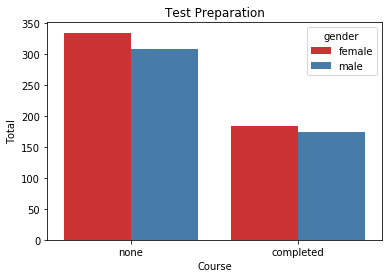

In [8]:

ax = sns.countplot(x="test preparation course", hue="gender", palette="Set1", data=student_df)
ax.set(title="Test Preparation", xlabel="Course", ylabel="Total")
plt.show()



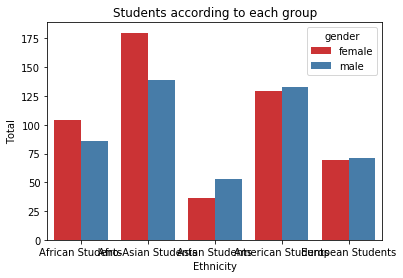

In [9]:

ax = sns.countplot(x="race/ethnicity", hue="gender", palette="Set1", data=student_df1)
ax.set(title="Students according to each group", xlabel="Ethnicity", ylabel="Total")
plt.show()


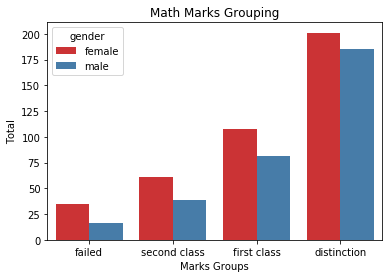

In [15]:
marks_intervals = [0, 40, 50, 60, 75]
categories = ['failed', 'second class', 'first class', 'distinction']
student_df1['Marks_Categories_math'] = pd.cut(student_df1.mathscore, marks_intervals, labels=categories)
ax = sns.countplot(x="Marks_Categories_math", hue="gender", palette="Set1", data=student_df1)
ax.set(title="Math Marks Grouping", xlabel="Marks Groups", ylabel="Total")
plt.show()

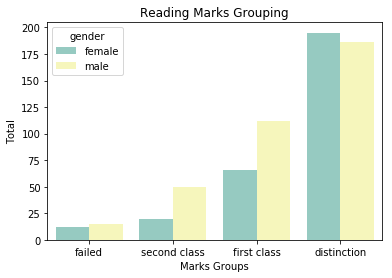

In [13]:
student_df1['Marks_Categories_reading'] = pd.cut(student_df1.readingscore, marks_intervals, labels=categories)
ax = sns.countplot(x="Marks_Categories_reading", hue="gender", palette="Set3", data=student_df1)
ax.set(title="Reading Marks Grouping", xlabel="Marks Groups", ylabel="Total")
plt.show()

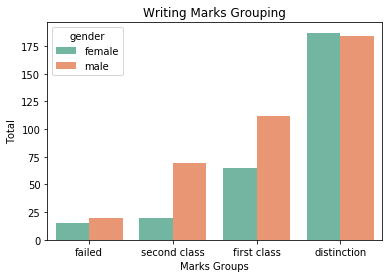

In [12]:
student_df1['Marks_Categories_writing'] = pd.cut(student_df1.writingscore, marks_intervals, labels=categories)
ax = sns.countplot(x="Marks_Categories_writing", hue="gender", palette="Set2", data=student_df1)
ax.set(title="Writing Marks Grouping", xlabel="Marks Groups", ylabel="Total")
plt.show()